In [1]:
import six

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_venn
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='paper')

%matplotlib inline
import flotilla

%load_ext autoreload
%autoreload 2

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm_figure1_post_kmeans_outliers', flotilla_dir=flotilla_dir)

2016-12-29 12:41:02	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_post_kmeans_outliers/datapackage.json
2016-12-29 12:41:02	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2016-12-29 12:41:16 	Initializing Study
2016-12-29 12:41:16 	Initializing Predictor configuration manager for Study
2016-12-29 12:41:16	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-29 12:41:16	Added ExtraTreesClassifier to default predictors
2016-12-29 12:41:16	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-29 12:41:16	Added ExtraTreesRegressor to default predictors
2016-12-29 12:41:16	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-12-29 12:41:16	Added GradientBoostingClassifier to default predictors
2016-12-29 12:41:16	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-12-29 12:41:16	Added GradientBoostingRegressor to default predictors
2016-12-29 12:41:16 	Loading metadata
2016-12-29 12:41:16	Loading expression data
2016-1

In [2]:
figure_folder = 'figures/003_expression_quality_control'
! mkdir -p $figure_folder

In [3]:
study.splicing.minimum_samples

10

In [4]:
mkdir $folder

mkdir: cannot create directory `figures': File exists


## Expression Quality Control
### Number of detected genes

detected_genes.mean() 8.02368224299
detected_genes.groupby(study.sample_id_to_phenotype).mean() phenotype
MN      7.667781
NPC     7.594408
iPSC    8.925308
dtype: float64


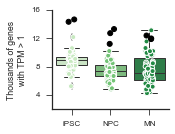

In [5]:
sns.set(context='paper', style='ticks')

detected_genes = (study.expression.data_original > 1).sum(axis=1)
detected_genes = detected_genes/1000

six.print_('detected_genes.mean()', detected_genes.mean())
six.print_('detected_genes.groupby(study.sample_id_to_phenotype).mean()', 
           detected_genes.groupby(study.sample_id_to_phenotype).mean())

detected_genes = detected_genes.to_frame().join(study.metadata.data[['pooled', 'phenotype']])
detected_genes = detected_genes.rename(columns={0: 'n_genes_detected'})

detected_genes_pooled = detected_genes.ix[detected_genes.pooled]
detected_genes_single = detected_genes.ix[~detected_genes.pooled]

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.boxplot(x='phenotype', y='n_genes_detected', order=study.phenotype_order, linewidth=1,
               data=detected_genes_single, palette=study.phenotype_color_ordered)
sns.stripplot(x='phenotype', y='n_genes_detected', order=study.phenotype_order, #size=2, 
              linewidth=1, edgecolor='white',
               data=detected_genes_single, palette=study.phenotype_color_ordered, jitter=True)
sns.stripplot(x='phenotype', y='n_genes_detected', order=study.phenotype_order,linewidth=1,
              data=detected_genes_pooled, color='k', size=5, jitter=True)
sns.despine()
ax.set_xlabel('')

ax.set_ylabel('Thousands of genes\nwith TPM > 1')

# Reduce number of ticks
yloc = plt.MaxNLocator(5)
ax.yaxis.set_major_locator(yloc)

sns.despine()
fig.tight_layout()
fig.savefig('{}/detected_genes.pdf'.format(figure_folder))

### Shannon diversity for Expression

In [6]:
expression_singles = study.expression.singles
six.print_(expression_singles.shape)
not_outliers = study.expression.singles.index.difference(study.expression.outliers.index)
expression_singles = expression_singles.loc[not_outliers]
six.print_(expression_singles.shape)

(206, 18594)
(191, 18594)


In [7]:
expression_sum = expression_singles.groupby(study.sample_id_to_phenotype).sum()
expression_proportions = expression_sum.divide(expression_sum.sum(axis=1), axis=0)
expression_proportions

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,0.000106,0.000000,0.000037,0.000058,0.000028,0.000035,0.000018,0.000030,0.000005,0.000080,...,0.000055,0.000030,0.000034,0.000021,0.000057,0.000023,0.000055,0.000009,0.000018,0.000035
NPC,0.000168,0.000000,0.000106,0.000063,0.000044,0.000036,0.000019,0.000059,0.000007,0.000040,...,0.000030,0.000026,0.000021,0.000012,0.000098,0.000013,0.000035,0.000006,0.000014,0.000031
iPSC,0.000168,0.000018,0.000118,0.000048,0.000053,0.000089,0.000053,0.000060,0.000037,0.000042,...,0.000019,0.000051,0.000018,0.000010,0.000081,0.000012,0.000028,0.000003,0.000012,0.000025


In [8]:
folder 

'figures'

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


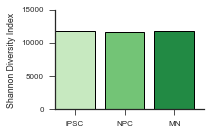

In [19]:
sns.set(style='ticks', context='paper')
expression_diversity = np.exp(- expression_proportions.multiply(np.log(expression_proportions)).sum(axis=1))
expression_diversity = expression_diversity[study.phenotype_order]

fig, ax = plt.subplots(figsize=(3, 2))
left = np.arange(expression_diversity.shape[0])
color = [study.phenotype_to_color[p] for p in expression_diversity.index]
ax.bar(left, expression_diversity, color=color, linewidth=1)

xticks = left + 0.4
ax.locator_params('y', nbins=4)
ax.set(xticks=xticks, xticklabels=expression_diversity.index, ylabel='Shannon Diversity Index')
sns.despine()
fig.tight_layout()
fig.savefig('{}/shannon_diversity_index_expression.pdf'.format(figure_folder))

In [20]:
expression_diversity_df = expression_diversity.reset_index()
expression_diversity_df = expression_diversity_df.rename(columns={0: 'Shannon Diversity'})
expression_diversity_df['data_type'] = 'Expression'
expression_diversity_df

,phenotype,Shannon Diversity,data_type
0,iPSC,11746.188792,Expression
1,NPC,11689.605631,Expression
2,MN,11768.271871,Expression


In [21]:
# splicing_diversity_df = diversity.reset_index()
# splicing_diversity_df = splicing_diversity_df.rename(columns={0: 'Shannon Diversity'})
# splicing_diversity_df['data_type'] = 'Splicing'
# splicing_diversity_df

In [22]:
# diversity_df = pd.concat([expression_diversity_df, splicing_diversity_df])
# diversity_df

In [23]:
# fig, ax = plt.subplots(figsize=(3, 2))
# sns.barplot(x='data_type', y='Shannon Diversity', data=diversity_df, hue='phenotype', 
#             palette=study.phenotype_color_ordered, hue_order=study.phenotype_order)
# ax.set(xlabel='', ylabel='Shannon Diversity')
# ax.locator_params(nbins=5, axis='y')
# sns.despine()
# fig.tight_layout()
# fig.savefig('{}/shannon_diversity_expression_splicing.pdf'.format(diversity_folder))

## PCA

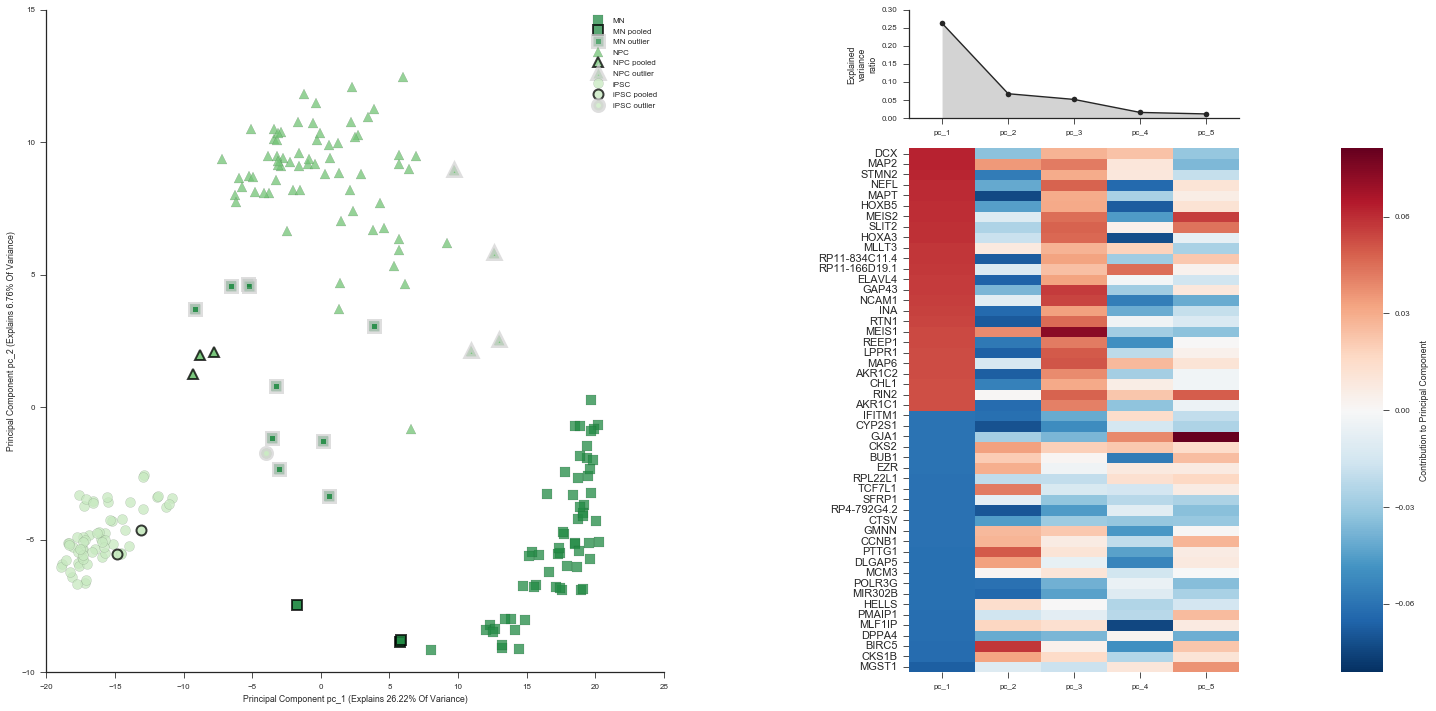

In [24]:
viz = study.plot_pca(show_vectors=False, scale_by_variance=False, markersize=10)
viz.fig_reduced.savefig('{}/pca_variant.pdf'.format(figure_folder))

P1_05 P7_08 0.99056025348
P1_05 P2_03 0.639723576858
M2nd_33 M2nd_34 0.885906259531
M2nd_33 P1_05 0.648397923262


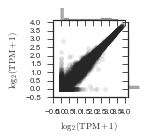

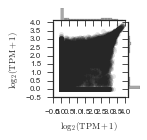

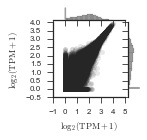

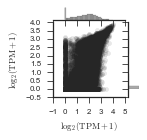

In [25]:
comparisons = [('P1_05', 'P7_08'),
               ('P1_05', 'P2_03'),
               ('M2nd_33', 'M2nd_34'),
               ('M2nd_33', 'P1_05')]
for sample1, sample2 in comparisons:
    x = np.log2(study.expression.data.loc[sample1]+1)
    y = np.log2(study.expression.data.loc[sample2]+1)
    correlation = x.corr(y)
    six.print_(sample1, sample2, correlation)
#     study.plot_two_samples(sample1, sample2, 'expression', size=2, color='#262626', stat_func=None, alpha=0.5, rasterized=True)
    sns.jointplot(x, y, size=2, color='#262626', stat_func=None, alpha=0.1, rasterized=True)
    fig = plt.gcf()

    ax = fig.axes[0]
    ax.set(#xticks=[0, 4, 8, 12], yticks=[0, 4, 8, 12], 
           xlabel='$\log_2 (\mathrm{TPM} + 1)$', ylabel='$\log_2 (\mathrm{TPM} + 1)$')
    fig.savefig("{}/{}_vs_{}_expression.pdf".format(figure_folder, sample1, sample2), dpi=600)